# Introduction


the Health Facts database (Cerner Corporation, Kansas City, MO) is a national data warehouse that collects comprehensive clinical records across hospitals throughout the United States. 

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

## structure of the project 

the dataset it's a multiclass classification problem, but since the target is havily imbalanced and 2 of the 3 target are readmitted before and readmitted after 30 days, we can group this 2 class and use the dataset for a binary classifcation problem 

## mapping 

### discharge

> discharge_disposition_id,description
1,                        Discharged to home
2,                        Discharged/transferred to another short term hospital
3,                        Discharged/transferred to SNF
4,                        Discharged/transferred to ICF
5,                        Discharged/transferred to another type of inpatient care institution
6,                        Discharged/transferred to home with home health service
7,                        Left AMA
8,                        Discharged/transferred to home under care of Home IV provider
9,                        Admitted as an inpatient to this hospital
10,                       Neonate discharged to another hospital for neonatal aftercare
11,                       Expired
12,                       Still patient or expected to return for outpatient services
13,                       Hospice / home
14,                       Hospice / medical facility
15,                       Discharged/transferred within this institution to Medicare approved swing bed
16,                       Discharged/transferred/referred another institution for outpatient services
17,                       Discharged/transferred/referred to this institution for outpatient services
18,                       NULL
19,                       "Expired at home. Medicaid only, hospice."
20,                       "Expired in a medical facility. Medicaid only, hospice."
21,                       "Expired, place unknown. Medicaid only, hospice."
22,                       Discharged/transferred to another rehab fac including rehab units of a hospital .
23,                       Discharged/transferred to a long term care hospital.
24,                       Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25,                       Not Mapped
26,                       Unknown/Invalid
27,                       Discharged/transferred to a federal health care facility.
28,                       Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29,                       Discharged/transferred to a Critical Access Hospital (CAH).                                                                                                                                       30,                       Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

### admission source 

> admission_source_id,description
1, Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5, Transfer from a Skilled Nursing Facility (SNF)
6, Transfer from another health care facility
7, Emergency Room
8, Court/Law Enforcement
9, Not Available
10, Transfer from critial access hospital
11,Normal Delivery
12, Premature Delivery
13, Sick Baby
14, Extramural Birth
15,Not Available
17,NULL
18, Transfer From Another Home Health Agency
19,Readmission to Same Home Health Agency
20, Not Mapped
21,Unknown/Invalid
22, Transfer from hospital inpt/same fac reslt in a sep claim
23, Born inside this hospital
24, Born outside this hospital
25, Transfer from Ambulatory Surgery Center
26,Transfer from Hospice

### admission type 

> admission_type_id,description
1,                Emergency
2,                Urgent
3,                Elective
4,                Newborn
5,                Not Available
6,                NULL
7,                Trauma Center
8,                Not Mapped

### diagnosis 

> 390–459, 785                           Diseases of the circulatory system
460–519, 786                            Diseases of the respiratory system
520–579, 787                             Diseases of the digestive system
250.xx                                          Diabetes mellitus  
800–999                                      Injury and poisoning
710–739                                       Diseases of the musculoskeletal system and connective tissue
580–629                                      Diseases of the genitourinary system
140–239                                      Neoplasms                                                                                                                                                                            780, 781, 784, 790–799             Other symptoms, signs, and ill-defined conditions                                                                                                  240–279, without 250           Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes                                                                                                 
680–709, 782                         Diseases of the skin and subcutaneous tissue                                                                                 
001–139                                  Infectious and parasitic diseases                                                                                                      
290–319                                 Mental disorders                                                                                                                                  
E–V                                         External causes of injury and supplemental classification                                                              
280–289                                Diseases of the blood and blood-forming organs                                  .
320–359                                Diseases of the nervous system
630–679                                Complications of pregnancy, childbirth, and the puerperium
360–389                                Diseases of the sense organs
740–759                                Congenital anomalies

## 

# data exploration 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import itertools


from ucimlrepo import fetch_ucirepo 

from scipy.stats import chi2_contingency
from scipy.stats import loguniform


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import learning_curve




from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline

from imblearn.under_sampling import TomekLinks

import warnings

warnings.filterwarnings('ignore')










In [2]:
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 


  



## preliminary

### missing / singular values 

In [3]:
X.head(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [4]:
missing = X.isnull().sum()*100/len(X)
print(missing[missing>0])

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64


In [5]:
unique = X.nunique()
unique


race                          5
gender                        3
age                          10
weight                        9
admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
payer_code                   17
medical_specialty            72
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
diag_1                      716
diag_2                      748
diag_3                      789
number_diagnoses             16
max_glu_serum                 4
A1Cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglita

<hr>

- Weight column in the Dataset has nearly 97% missing values, thus it can be dropped.

- Columns admission_type_id, discharge_disposition_id, admission_source_id are mapped to a specific definition 

- diag1,diad2,diag3 are also mapped to other value through the icd9 code 

- Columns named 'examide','citoglipton',acetohexamide  have only a single value for all the entries, hence they do not add any value to the model training can be removed

- Columns named ‘payer_code’, ‘medical_speciality’ have almost 50% of null values thus we will remove the columns 



### creating a binary classification dataset 

In [6]:
y= y["readmitted"].map({"NO": 0, "<30": 1, ">30": 1})

### linear correlation of numerical features

<Axes: >

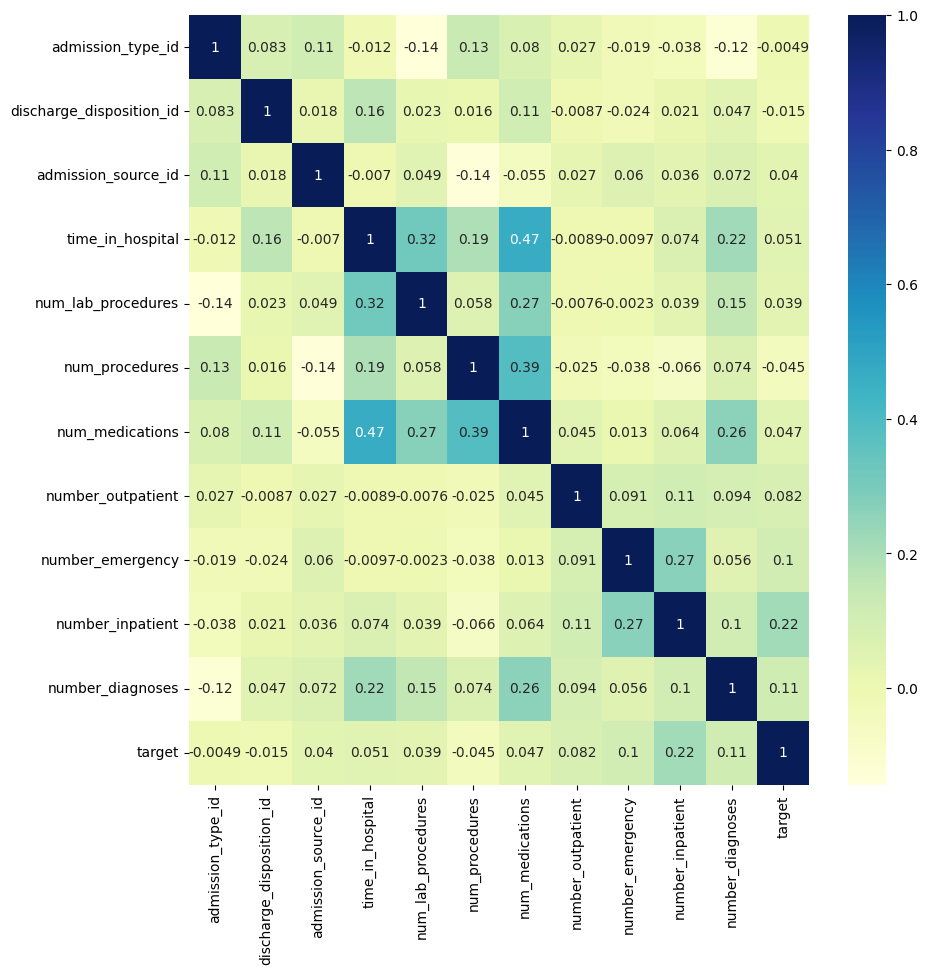

In [7]:
df = X.copy()
df["target"] = y

fig, a = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu", annot=True)


as we can see the linear correlation does not seem to be strong w.r.t. the target but this does not exclude possible non linear correlation that we will study depeer through associations 

## race

In [8]:
X.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

<Axes: ylabel='race'>

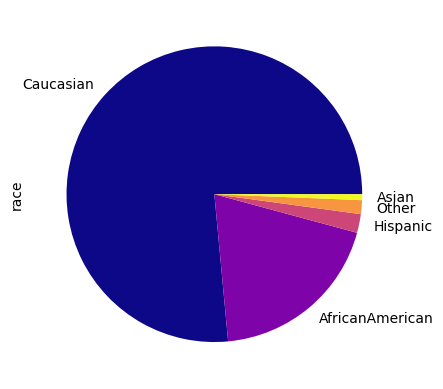

In [9]:
X.race.value_counts().plot(kind="pie", colormap="plasma")

In [10]:

contingency_table = pd.crosstab(df['race'], df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("P-value:", p)  # If p > 0.05, we group them

P-value: 6.741337680798176e-19


since the p value is lower then 0.05 we will not group the smaller category in race 

## age

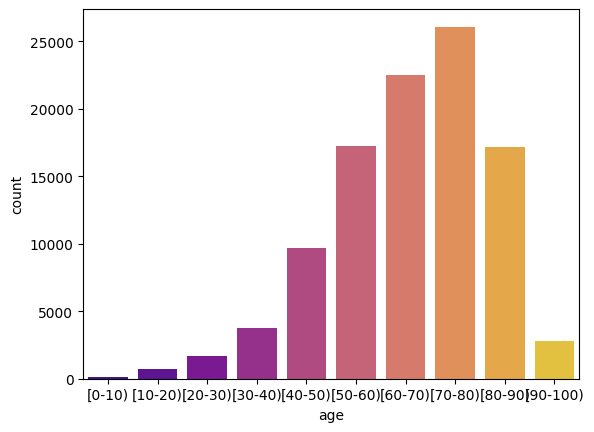

In [11]:
sns.countplot(data=X, x="age", palette="plasma")
plt.show()

for age we will create a custom tranformer that mappes each range to the midpoint 

## admission/discharged

### admission type

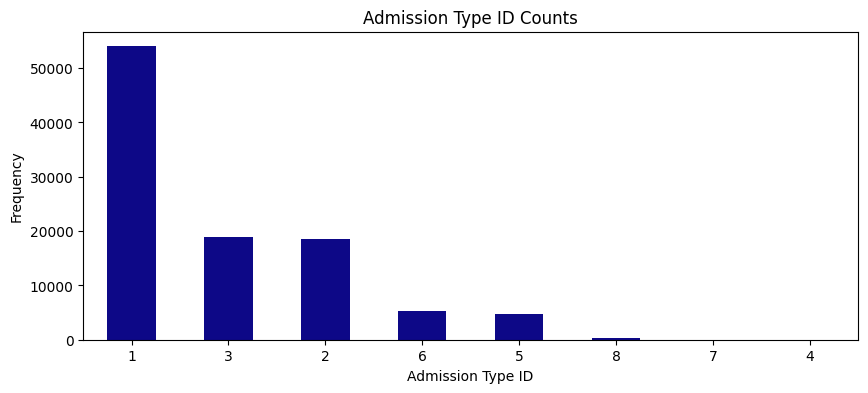

1    53.053083
3    18.541556
2    18.159307
6     5.199182
5     4.701963
8     0.314447
7     0.020636
4     0.009826
Name: admission_type_id, dtype: float64

In [12]:
admission_type_counts = X["admission_type_id"].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 4))
admission_type_counts.plot(kind='bar', colormap='plasma')

plt.title('Admission Type ID Counts')
plt.xlabel('Admission Type ID')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()


percentage= admission_type_counts/admission_type_counts.sum()*100
percentage


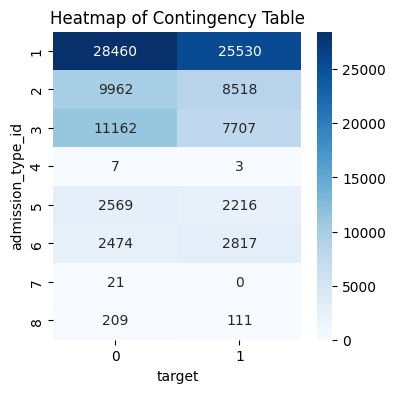

P-value: 4.3734314457319205e-79


In [13]:
plt.figure(figsize=(4, 4)) 
contingency_table = pd.crosstab(df['admission_type_id'], df['target'])
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Contingency Table')
plt.show()



chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p}")  # If p-value < 0.05, there is a significant relationship

<hr>

the best strategy for this column seems to be keeping the 1-2-3 as separete instances while for the "6" we will use knn imputer to impute the missing values  and then we will group the rest  (other approach were tryed but did not shown better results )

In [14]:
X['admission_type_id'] = X['admission_type_id'].replace(6, np.nan)

### discharge disposition 

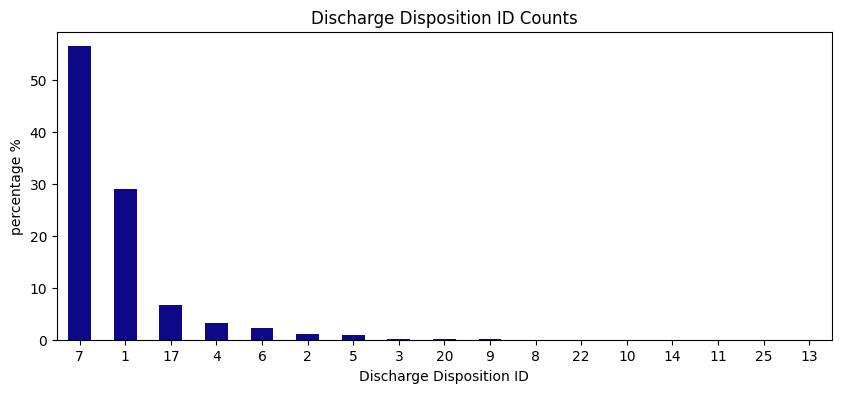

In [15]:
discharge_percent = X["admission_source_id"].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 4))
discharge_percent.plot(kind='bar', colormap='plasma')


plt.title('Discharge Disposition ID Counts')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('percentage %')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()



In [16]:
discharge_percent

7     56.496276
1     29.051943
17     6.663326
4      3.131694
6      2.224712
2      1.084842
5      0.840163
3      0.183755
20     0.158206
9      0.122831
8      0.015722
22     0.011792
10     0.007861
14     0.001965
11     0.001965
25     0.001965
13     0.000983
Name: admission_source_id, dtype: float64

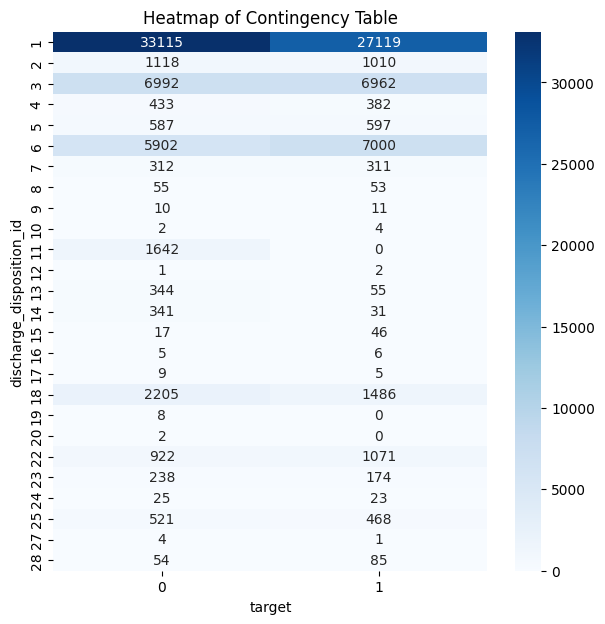

P-value: 0.0


In [17]:
plt.figure(figsize=(7, 7)) 
contingency_table = pd.crosstab(df['discharge_disposition_id'], df['target'])
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Contingency Table')
plt.show()



chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p}")  # If p-value < 0.05, there is a significant relationship

after looking at the mapping we can conclude that: 

- since we are interested in readmitted patient we need to remove expired discharged (i.e. the ones that resulted in the patient dead) and the one resulting in a discharge to hospice 

-  we are gonna keep everything above 300 separated  and unify the rest

- as before we will map 18 to null and then use knn imputer for it 

In [18]:
mask = X["admission_source_id"] != 26

# we filter out the rows in which we have a patient admitted from a hospice 
X = X[mask]
y = y[mask]

In [19]:
mask = ~X["discharge_disposition_id"].between(19, 24)


X = X[mask]
y = y[mask]

In [20]:
X["discharge_disposition_id"] = X["discharge_disposition_id"].replace(6, np.nan)

### admission source 

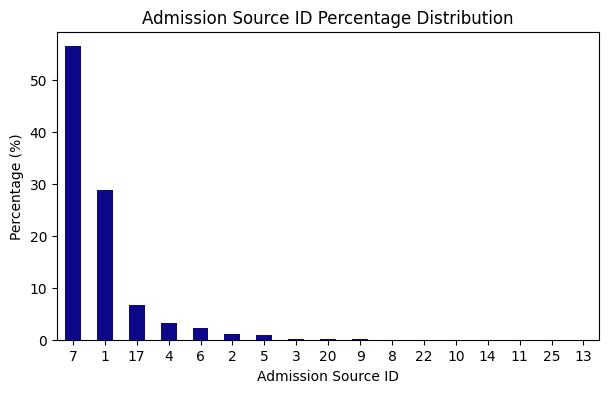

In [21]:
admission_source_percent = X["admission_source_id"].value_counts(normalize=True) * 100


plt.figure(figsize=(7, 4))
admission_source_percent.plot(kind='bar', colormap='plasma')


plt.title('Admission Source ID Percentage Distribution')
plt.xlabel('Admission Source ID')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  
plt.show()



In [22]:
admission_source_percent

7     56.503832
1     28.874254
17     6.763139
4      3.162039
6      2.259750
2      1.076503
5      0.844889
3      0.187306
20     0.162130
9      0.122856
8      0.016112
22     0.012084
10     0.008056
14     0.002014
11     0.002014
25     0.002014
13     0.001007
Name: admission_source_id, dtype: float64

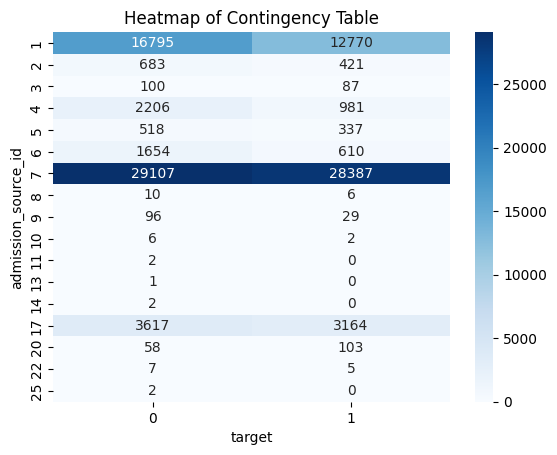

P-value: 1.4887499868070666e-220


In [23]:
contingency_table = pd.crosstab(df['admission_source_id'], df['target'])
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Contingency Table')
plt.show()


# we can see that there is a significant relationship between admission source and readmission
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p}")  # If p-value < 0.05, there is a significant relationship

the idea here is to divide as follow:

- emergency 

- group the referral, since both 2 and 3 are not very correlated 

- 4-5-6 as separeted and then

- everything else in one group since the value are too few

In [24]:
X["admission_source_id"] = X["admission_source_id"].replace(17, np.nan)

## diagnosis  

In [25]:
print(X.diag_1.nunique())


short_codes_unique = X[X["diag_1"].apply(lambda x: len(str(x)) < 3)]["diag_1"].unique()

# Print the wrong values
print(short_codes_unique)


715
['8' '38' '70' '82' '54' '78' '79' '41' '3' '53' '49' '11' '47' '7' '42'
 '39' '5' '9' '48' '94' '35' '34' '88' '31' '75' '27' '61' '36' '57' '97'
 '66' '98' '52' '84' '23' '58' '10']


the diagnosis have 715 distinct value, therefore the idea is to unify them in broader categories as shown in the following image, inside the value we also have codes that have less then 3 digits, we are gonna deem them as error as they are impossible to map

the idea is to group them with everything below a certain treshold in a category called others 

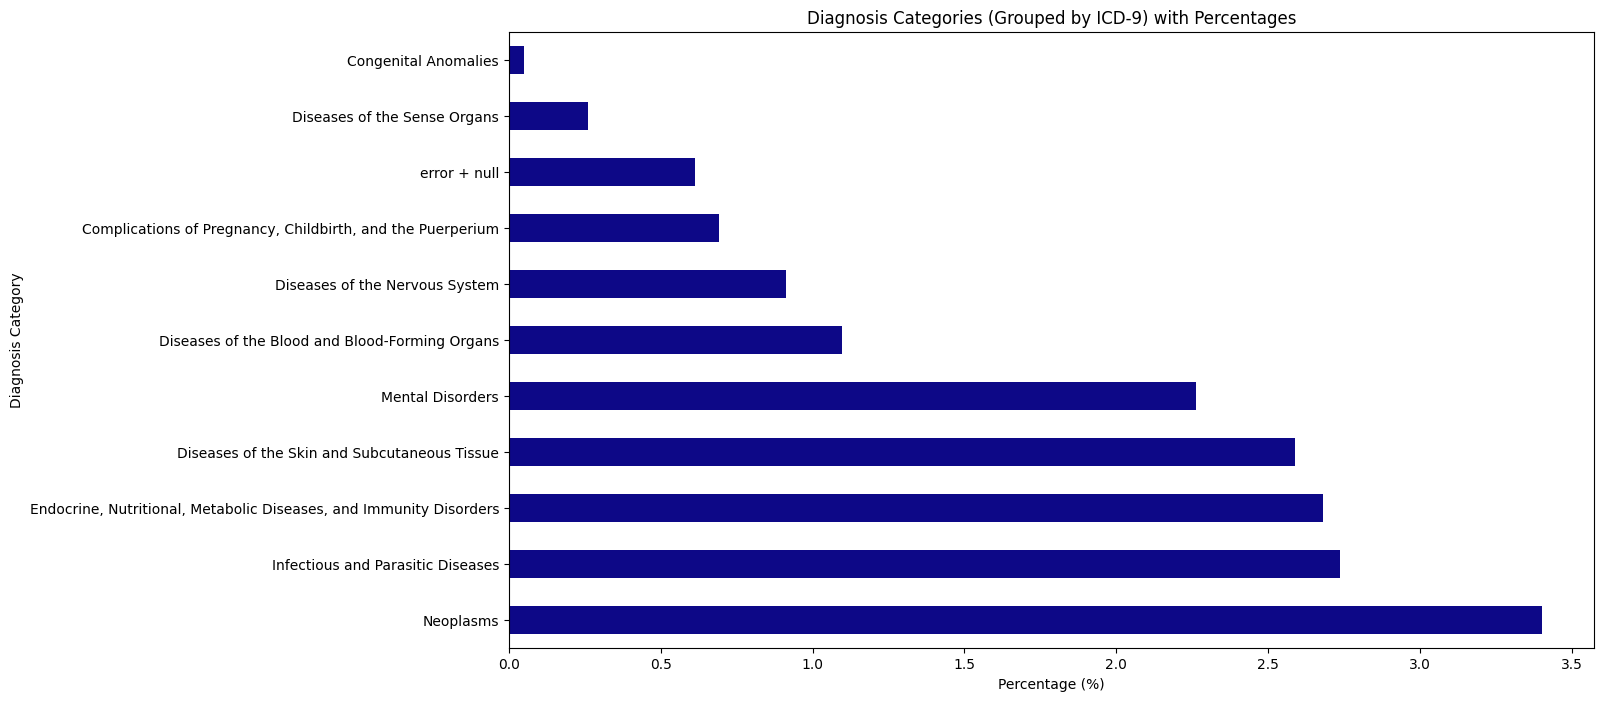

In [26]:
# Define the classify_icd9 function
def classify_icd9(code):     
    
    try:
        if isinstance(code, str):  # First, check if the code is a string (for "V" and "E" codes)
            if code.startswith("250"):  
                return "Diabetes "
            elif code.startswith("V") or code.startswith("E"):
                return "Other Symptoms, Signs, Ill-Defined Conditions"
            
        code = float(code)  # Convert to numeric if possible
        
        if 390 <= code <= 459 or code == 785:
            return "Circulatory System" 
        elif 460 <= code <= 519 or code == 786:
            return "Respiratory System"
        elif 520 <= code <= 579 or code == 787:
            return "Digestive System"
        elif 800 <= code <= 999:
            return "Injury & Poisoning"
        elif 710 <= code <= 739:
            return "Musculoskeletal System"
        elif 580 <= code <= 629 or code == 788:
            return "Genitourinary System"
        elif 140 <= code <= 239:
            return "Neoplasms"
        elif 790 <= code <= 799 or code == 780 or code == 781 or code == 784:
            return "Other Symptoms, Signs, Ill-Defined Conditions"
        elif 240 <= code <= 279 and code != 250:
            return "Endocrine, Nutritional, Metabolic Diseases, and Immunity Disorders"
        elif 680 <= code <= 709 or code == 782:
            return "Diseases of the Skin and Subcutaneous Tissue"
        elif 1 <= code <= 139:
            return "Infectious and Parasitic Diseases"
        elif 290 <= code <= 319:
            return "Mental Disorders"
        elif 280 <= code <= 289:
            return "Diseases of the Blood and Blood-Forming Organs"
        elif 320 <= code <= 359:
            return "Diseases of the Nervous System"
        elif 630 <= code <= 679:
            return "Complications of Pregnancy, Childbirth, and the Puerperium"
        elif 360 <= code <= 389:
            return "Diseases of the Sense Organs"
        elif 740 <= code <= 759:
            return "Congenital Anomalies"
        else:
            return  "error + null"
    except:
        return "not mapped"  # If conversion or classification fails'

# we do not want to create new columns 
category_counts = X["diag_1"].apply(classify_icd9).value_counts()

# Calculate the percentage of each category
category_percentages = (category_counts * 100 /len(X))
categories_not_necessary = category_percentages[category_percentages < 4]

plt.figure(figsize=(14, 8))
categories_not_necessary.plot(kind="barh", colormap="plasma")
plt.title("Diagnosis Categories (Grouped by ICD-9) with Percentages")
plt.xlabel("Percentage (%)")
plt.ylabel("Diagnosis Category")
plt.show()

- the idea is going to be to group together everything that is below the 4% treshold

## numerical columns 

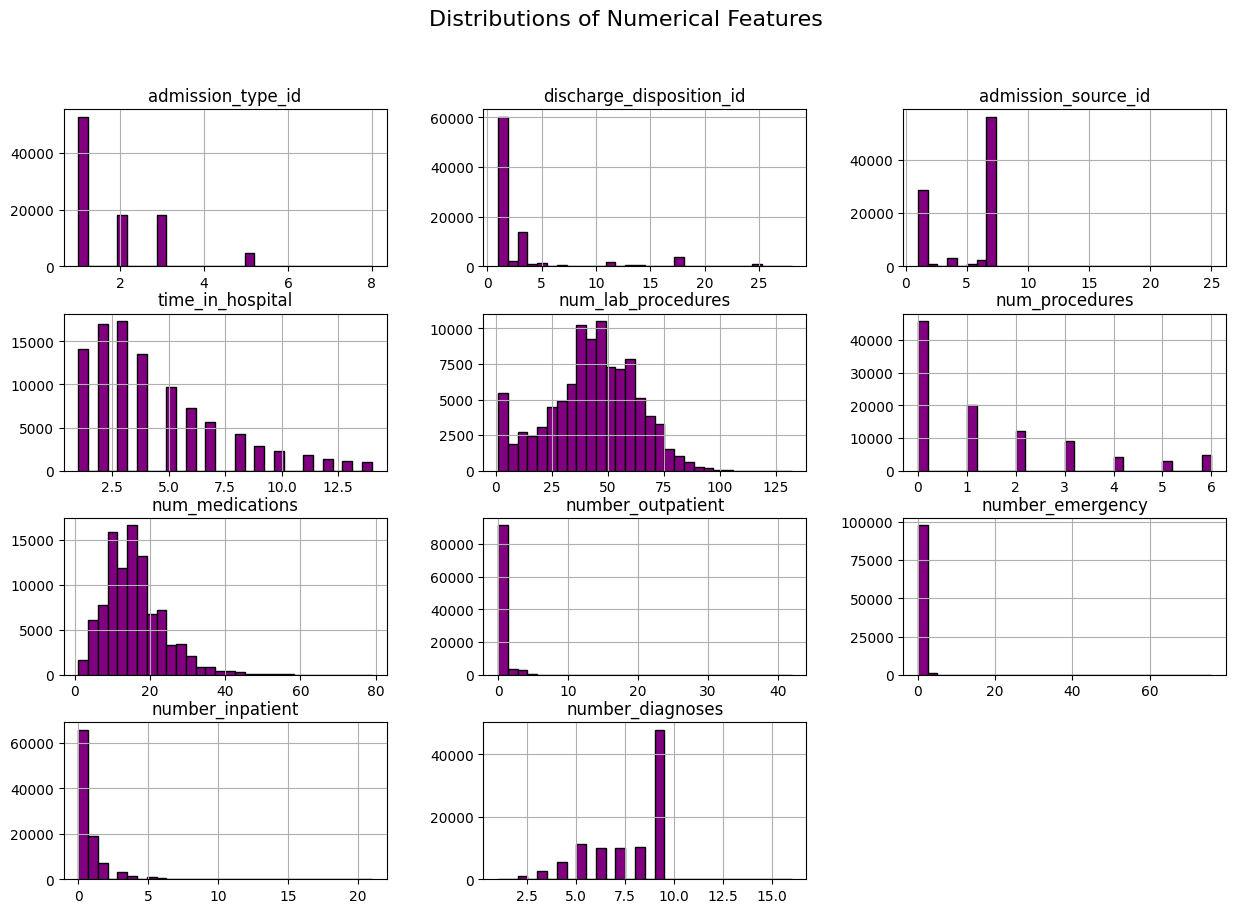

In [27]:
X.select_dtypes(include=['number']).hist(figsize=(15, 10), bins=30, color='purple', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

let us zoom for example in outpatient and inpatient 

## outpatient and inpatient 

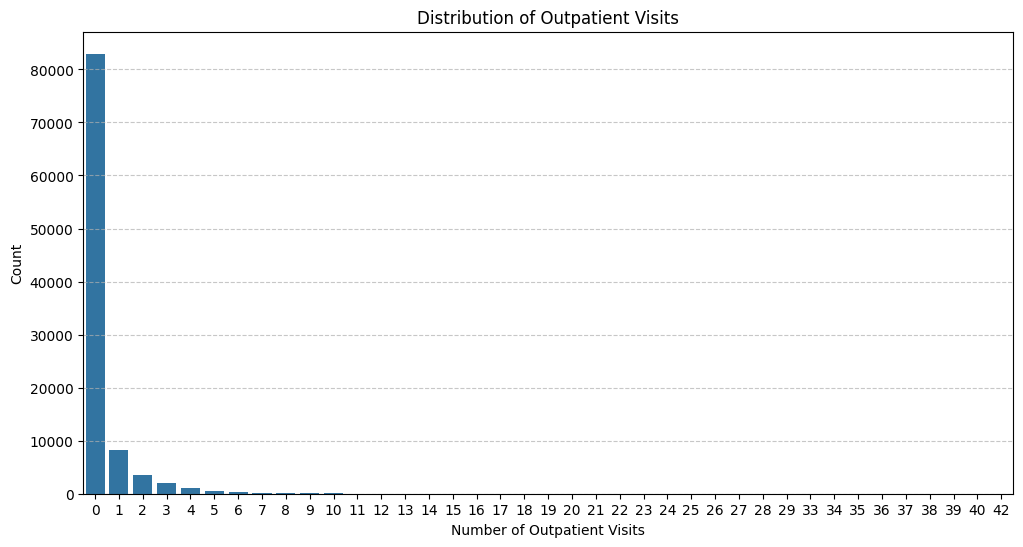

In [28]:
value_counts = X["number_outpatient"].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)


plt.xlabel("Number of Outpatient Visits")
plt.ylabel("Count")
plt.title("Distribution of Outpatient Visits")
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

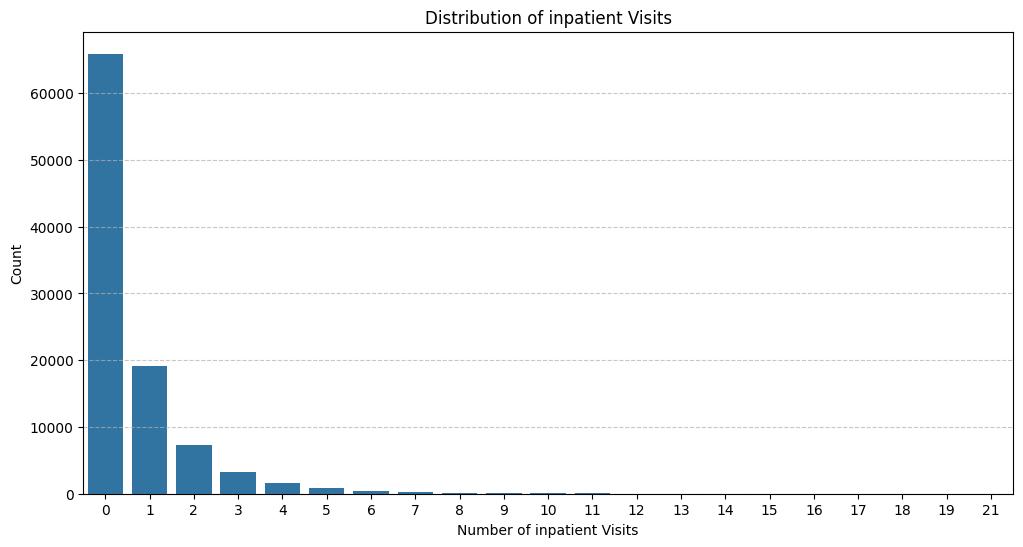

In [29]:
value_counts = X["number_inpatient"].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)


plt.xlabel("Number of inpatient Visits")
plt.ylabel("Count")
plt.title("Distribution of inpatient Visits")
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

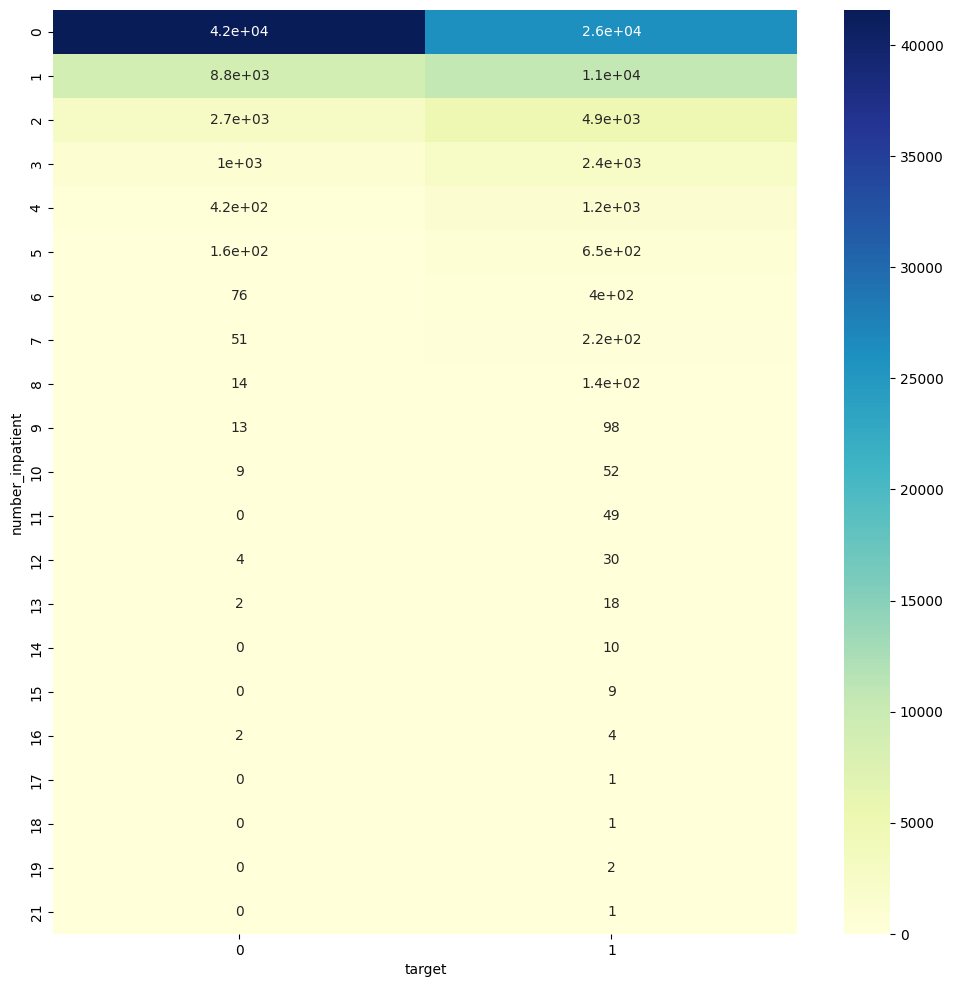

P-value: 1.4887499868070666e-220


In [30]:
plt.figure(figsize=(12, 12)) 
contingency_table = pd.crosstab(df["number_inpatient"], df["target"])
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.show()





chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p}") 

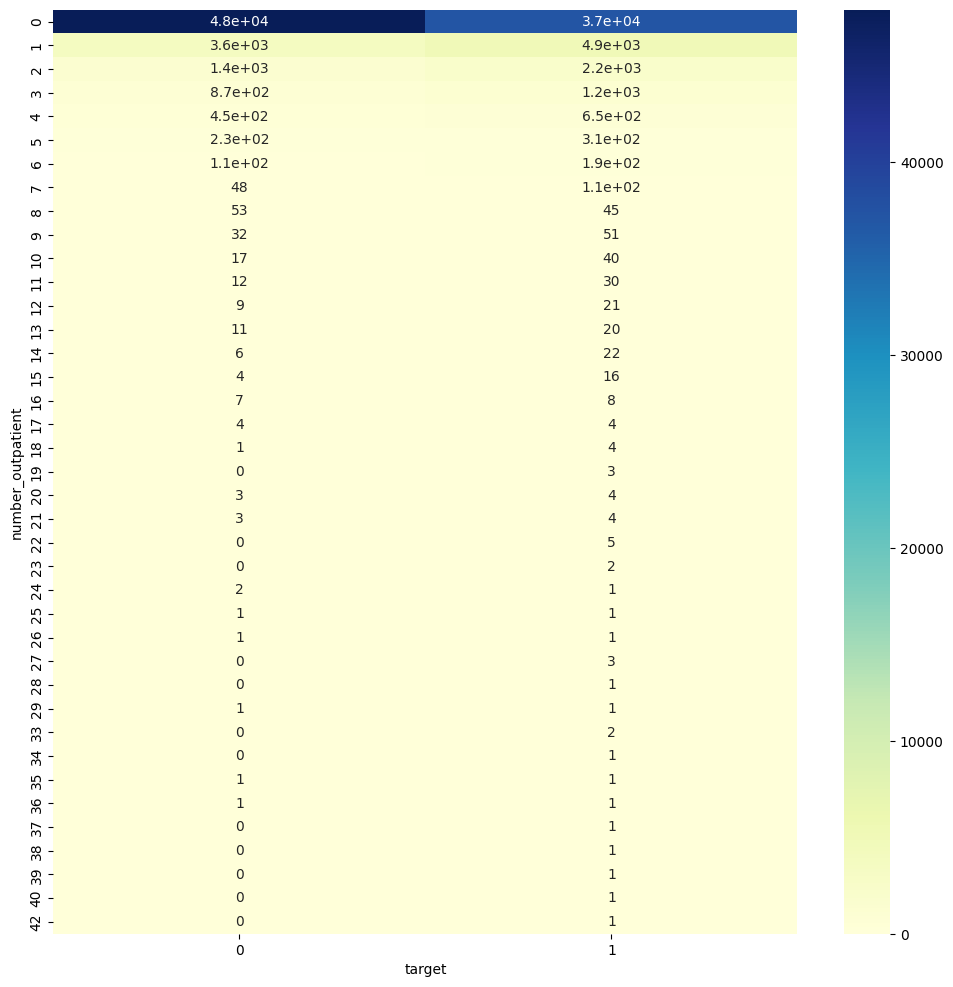

P-value: 1.4887499868070666e-220


In [31]:
plt.figure(figsize=(12, 12)) 
contingency_table = pd.crosstab(df["number_outpatient"], df["target"])
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")

plt.show()





chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p}")

as we can see data are havily skewed 

## medications 

we have 23 different medications we will try to keep only the most relevant one

we will remove the column that have no significant correlation and encode in the pipline the ones that have a significant correlation

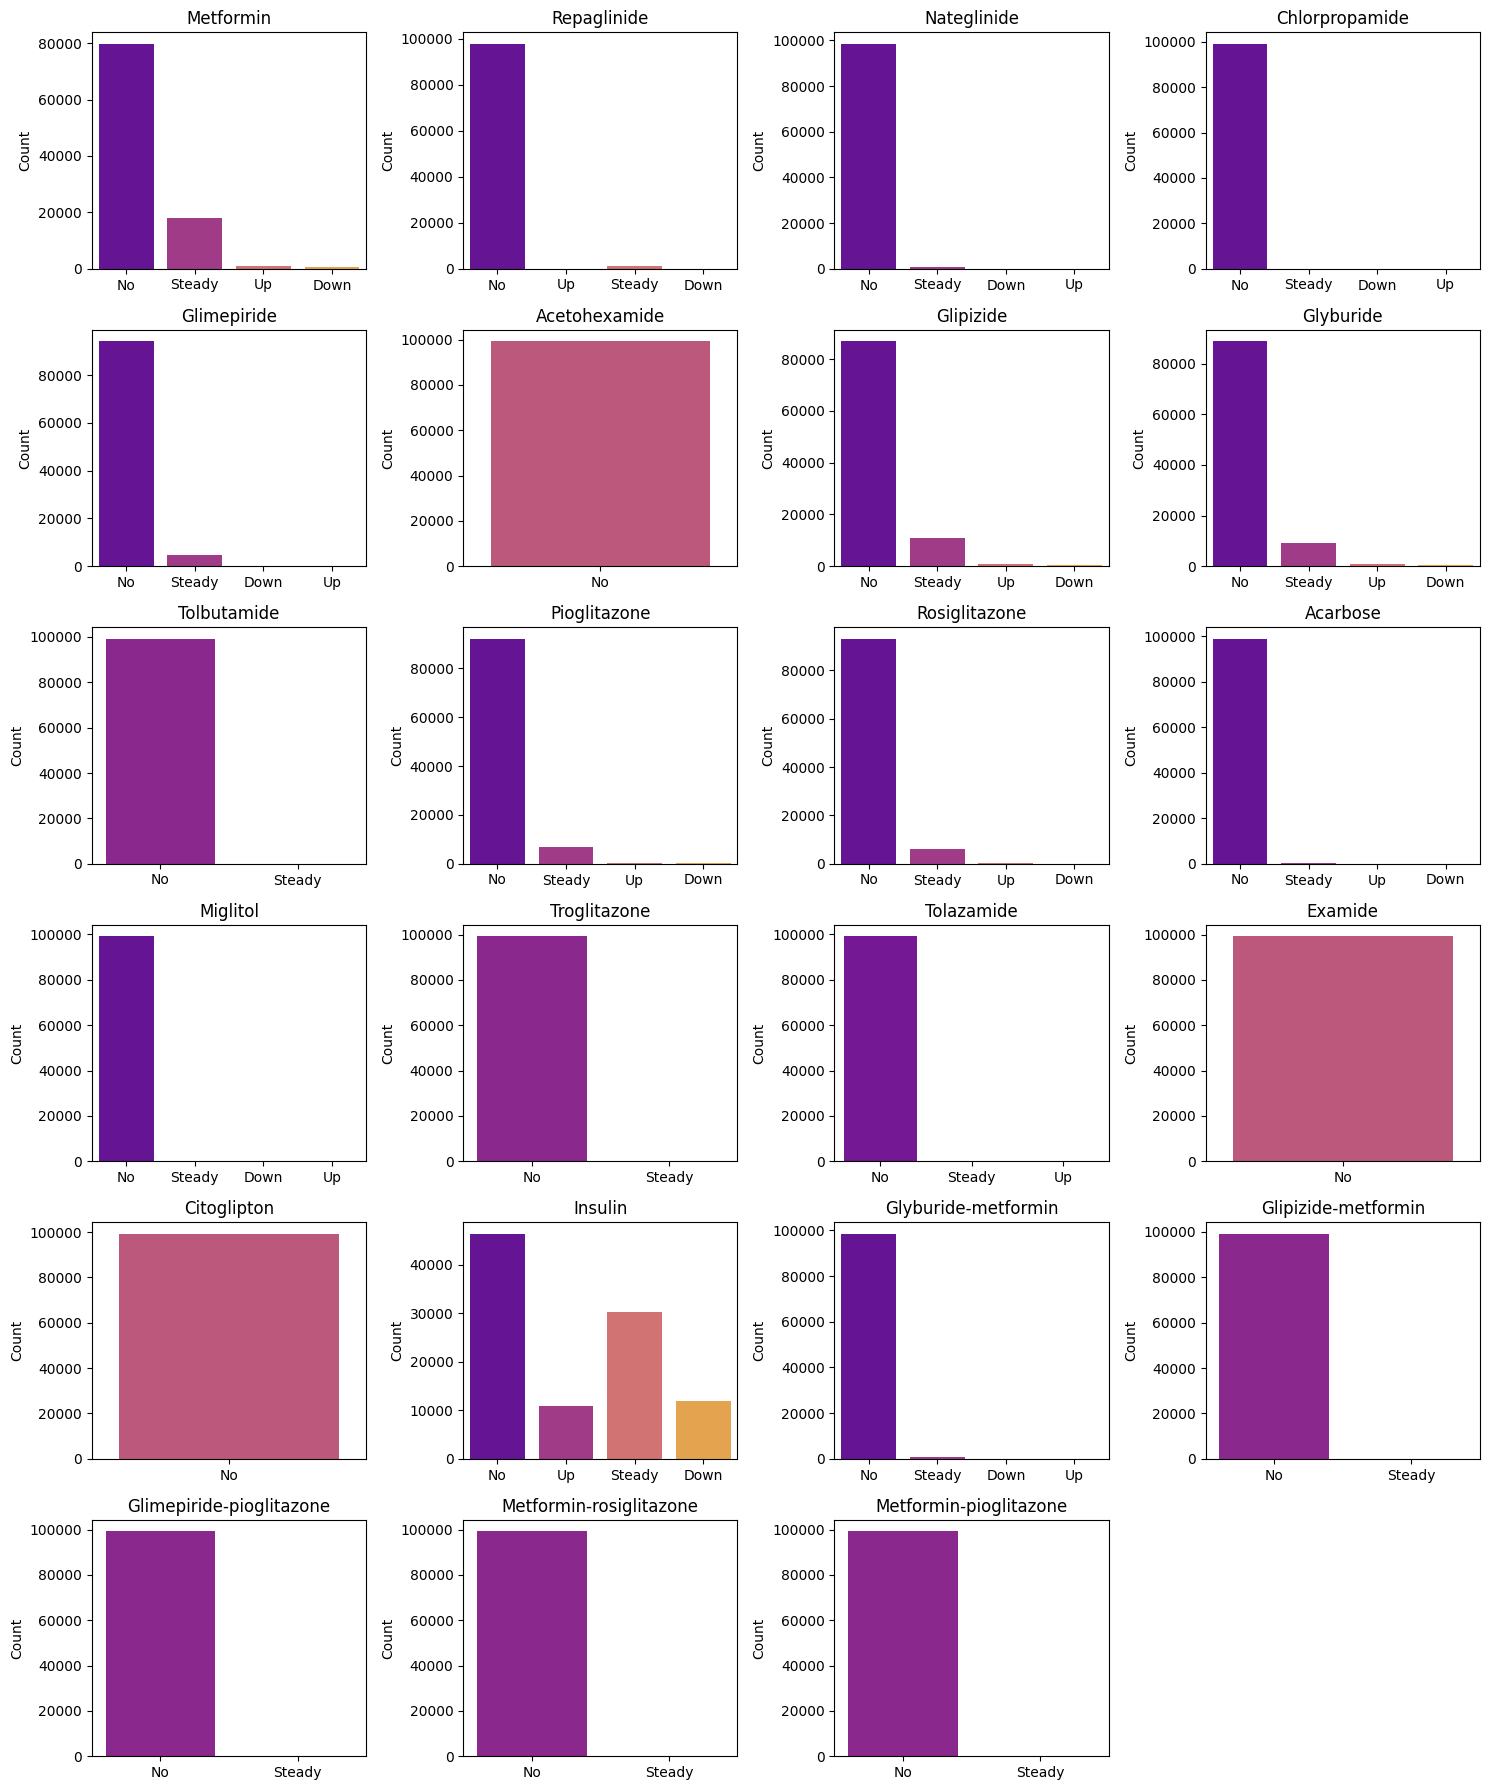

In [32]:
medications = df.iloc[:, 22:45]

num_medications = len(medications)
rows = 6 
cols = 4  

plt.figure(figsize=(15, 18))

for i, med in enumerate(medications, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=med, data=X, palette="plasma")
    plt.title(med.capitalize())
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()  # Prevent overlapping
plt.show()

In [33]:
def chi_square_test(df, cat_var, target_var):
    contingency_table = pd.crosstab(df[cat_var], df[target_var])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"yes '{cat_var}'" )
   


categorical_columns =  df.iloc[:, 22:45]



for cat_var in categorical_columns:
    chi_square_test(df, cat_var, 'target')

yes 'metformin'
yes 'repaglinide'
yes 'glipizide'
yes 'pioglitazone'
yes 'rosiglitazone'
yes 'acarbose'
yes 'insulin'


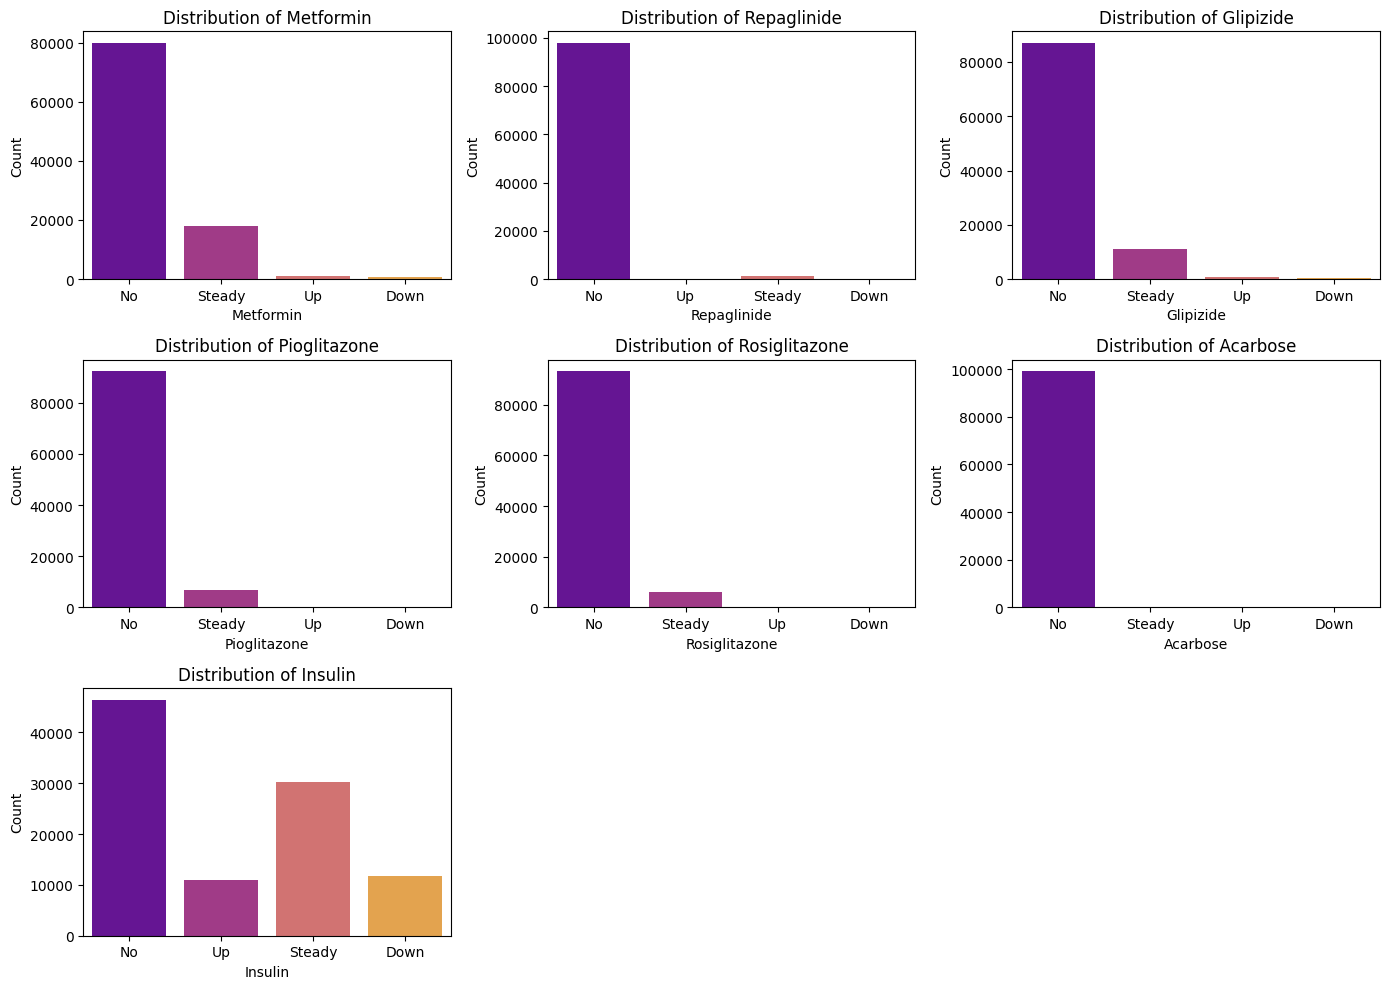

In [34]:
medications = ['metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin']


plt.figure(figsize=(14, 10))

# Loop through each medication and plot its countplot
for i, med in enumerate(medications, 1):
    plt.subplot(3, 3, i)  # 3x3 grid of subplots 
    sns.countplot(x=med, data=X, palette="plasma")
    plt.title(f'Distribution of {med.capitalize()}')
    plt.xlabel(med.capitalize())
    plt.ylabel('Count')

plt.tight_layout()  
plt.show()

# transformation pipline 

- race: simple imputer + one hot encoding

- gender: one hot encoding 

- age: custom tranformer 

- admission/discharge: custom tranformer 

- numerical features: robustescaler 

- diagnosis: custom encoder + we will keep only the first diagnosis 

- medications: ordinal encoding 

- medication change: ordinal encoding 

- diabetis medication:ordinal encoding 

## custom encoder 

In [35]:

class discharge_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  

    def transform(self, X, y=None):
        #nested np.where() to account for multiple conditions
        grouped_admission = np.where(X == 1, "discharge to home",  
                                     np.where(X == 2, "Discharged/transferred to another short term hospital", 
                                              np.where(X == 3, "Discharged/transferred to SNF", 
                                                       np.where(X == 4, "Discharged/transferred to ICF", 
                                                                np.where(X == 5, "Discharged/transferred to another type of institution", 
                                                                         np.where(X == 6, "Discharged/transferred to home with home health service", 
                                                                                  np.where(X == 7, "Left AMA",
                                                                                           np.where(X == 25, "not mapped",
                                                                                                    "other"))))))))
                                                                                           
              
                                              
                                                                         
        
        return grouped_admission.reshape(-1, 1)


class Admission_Type_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  

    
    def transform(self, X, y=None):
        #nested np.where() to account for multiple conditions
        grouped_admission = np.where(X == 1, "Emergency", 
                                     np.where(X == 2, "Urgent",
                                              np.where(X == 3, "Elective",
                                                       "Other")))
        return grouped_admission.reshape(-1, 1)


class AdmissionSourceTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  

    def transform(self, X, y=None):
        #nested np.where() to account for multiple conditions
        grouped_admission = np.where(np.isin(X, [1, 2, 3]), "Referral",  
                                     np.where(X == 4, "transfer from hospital",  
                                              np.where(X == 5, "transfer from skilled nurse facility",  
                                                       np.where(X == 6, "transfer from another health care facility",  
                                                                np.where(X == 7, "Emergency Room",  
                                                                         "Other")))))  # Everything else -> 'Other'
        
        return grouped_admission.reshape(-1, 1)





age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}

# Custom transformer to replace age categories with midpoint values
class AgeMidpointTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X):
        return X.replace(age_mapping).to_numpy().reshape(-1, 1) 




class ICD9CategoryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.04):  # Default: Merge categories with <4%
        self.threshold = threshold
        self.major_categories = None

    def fit(self, X, y=None):
        """Find major categories (≥ 4% of the dataset)."""
        categories = X["diag_1"].apply(classify_icd9)  # Use external classify_icd9 function
        category_counts = categories.value_counts(normalize=True)
        self.major_categories = category_counts[category_counts >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        """Apply classification & unify small categories into 'Other'."""
        transformed = X["diag_1"].apply(classify_icd9)  # Use external classify_icd9 function
        transformed = transformed.apply(lambda x: x if x in self.major_categories else "Other")
        return transformed.to_frame()  # Return as DataFrame



## pipeline 

In [37]:
pipeline_race = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("hot", OneHotEncoder(categories="auto", drop='first', handle_unknown='ignore'))
])

pipeline_age = Pipeline([
    ("custom", AgeMidpointTransformer()),
    ("scaler", RobustScaler())
    
])
pipeline_admission_type = Pipeline([
    ("imp", KNNImputer(n_neighbors=5)),
    ("custom", Admission_Type_Transformer()),  # Custom grouping
    ("hot", OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore"))  # One hot encoding
])
pipeline_admission_source = Pipeline([
    ("imp", KNNImputer(n_neighbors=5)),
    ("custom", AdmissionSourceTransformer()),  # Custom grouping
    ("hot", OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore"))  # One hot encoding
])

pipeline_diag = Pipeline([
    ("custom", ICD9CategoryTransformer()),  # Custom grouping
    ('hot', OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore"))  # Encoding
])

pipeline_admission_discharge = Pipeline([
    ("imp", KNNImputer(n_neighbors=5)),
    ("custom", discharge_Transformer()),  # Custom grouping
    ("hot", OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore"))  # One hot encoding
])



final_transformation = ColumnTransformer(transformers=[
    # Custom transformations
    ("race", pipeline_race, ["race"]),
    ("age", pipeline_age, ["age"]),
    ("discharge", pipeline_admission_discharge, ["discharge_disposition_id"]),
    ("admission_type", pipeline_admission_type, ["admission_type_id"]),
    ("admission_source", pipeline_admission_source, ["admission_source_id"]),
    ("diag_1", pipeline_diag, ["diag_1"]),
    
    ("num_lab_proc", RobustScaler(), ["num_lab_procedures"]),
    ("num_procedures", RobustScaler(), ["num_procedures"]),
    ("num_medications", RobustScaler(), ["num_medications"]),
    ("time_in_hospital", RobustScaler(), ["time_in_hospital"]),
    ("number_diagnoses", RobustScaler(), ["number_diagnoses"]),
    ("number_inpatient", RobustScaler(), ["number_inpatient"]),
    ("number_outpatient", RobustScaler(), ["number_outpatient"]),
    ("number_emergency", RobustScaler(), ["number_emergency"]),
    
    # Ordinal encoding
    ("medication_change", OrdinalEncoder(categories=[['No', 'Ch']]), ["change"]),
    ("metformin", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["metformin"]),
    ("repaglinide", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["repaglinide"]),
    ("glipizide", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["glipizide"]),
    ("glimepiride", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["glimepiride"]),
    ("pioglitazone", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["pioglitazone"]),
    ("rosiglitazone", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["rosiglitazone"]),
    ("acarbose", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["acarbose"]),
    ("insulin", OrdinalEncoder(categories=[["No", "Down", "Steady", "Up"]]), ["insulin"]),
    ("change", OrdinalEncoder(categories=[["No", "Ch"]]), ["change"]),
    ("diabetesMed", OrdinalEncoder(categories=[["No", "Yes"]]), ["diabetesMed"]),
    ("max_glu_serum", OrdinalEncoder(categories=[["None", "Norm", ">200", ">300"]]), ["max_glu_serum"]),
    ("A1Cresult", OrdinalEncoder(categories=[["None", "Norm", ">7", ">8"]]), ["A1Cresult"]),
    
    # One-hot encoding
    ("gender", OneHotEncoder(categories="auto", drop='first', handle_unknown='ignore'), ["gender"])
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)





In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

# model selection 

## baseline model 

the following is the code of a very simple perceptron run on the dataset to test how well it would perform and get an idea of the metrics 

In [39]:

baseline_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', None),
    ('dim_reduction', None),
    ('classifier', Perceptron())
])


In [40]:

baseline_model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('race',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['race']),
                                                 ('age',
                                                  Pipeline(steps=[('custom',
                                                                   AgeMidpointTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age']),
                                                 ('discharge',
                                                  Pipeline(steps=[('imp...
                                                 ('max_glu_serum',
                                                  OrdinalEncoder(categories=[['None',
                                                                              'Norm',
                                                                              '>200',
                                                                              '>300']]),
                                                  ['max_glu_serum']),
                                                 ('A1Cresult',
                                                  OrdinalEncoder(categories=[['None',
                                                                              'Norm',
                                                                              '>7',
                                                                              '>8']]),
                                                  ['A1Cresult']),
                                                 ('gender',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('sampler', None), ('dim_reduction', None),
                ('classifier', Perceptron())])

In [41]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    scores = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1-Score": f1_score(y_test, y_pred, average='binary'),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    }
    
    return scores


In [42]:

results = evaluate_model(baseline_model_pipeline, X_test, y_test)
print(results)

{'Accuracy': 0.5874830068979406, 'Precision': 0.5782506702412868, 'Recall': 0.37810890763668237, 'F1-Score': 0.45723749585955614, 'ROC-AUC': 'N/A'}


# hyperparameter tuning 

In [43]:
X_train = final_transformation.fit_transform(X_train)
X_test = final_transformation.transform(X_test)
model_pipeline = IMBPipeline([
    ('sampler', None),
    ('dim_reduction', None),
    ('classifier', None)
])

In [44]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('sampler', None), ('dim_reduction', None),
                ('classifier', None)])

In [45]:
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE(k_neighbors=5)],
        'sampler__sampling_strategy':['minority',  0.9, 0,6 ,"not majority"]
    },
    
    {
        'sampler': [TomekLinks()],  
        'sampler__sampling_strategy': ['majority', "not minority", "minority"]
    }
]

dim_reduction_configs = [
    {'dim_reduction': [None]}, 
    
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [3, 7, 0.8 ,0.9]
    },
    {"dim_reduction":[LDA()] },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
    
]
classifier_configs = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [3, 5,  9, 10,30,100],
    },
    
    {'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,1000),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    
    {
        "classifier":[RandomForestClassifier()],
        "classifier__n_estimators": [10, 50, 100, 500],
        "classifier__max_depth": [3, 5,  9, 10,30],
        "classifier__class_weight" : [None, 'balanced']

    }
   
    


]   



In [46]:

all_configs = []
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs):
    # Merging of three dictionary into one
    all_parameters = []
    for element in configuration:
        for item in element.items():
            all_parameters.append(item)
    all_configs.append(dict(all_parameters)) # by dict(all_parameters) we create a dict from a list of pairs (key:value)

In [47]:
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 36'

In [48]:

rs = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=all_configs,
    n_iter=len(all_configs) * 3,
    n_jobs=-1,  # Use all available cores
    scoring='f1',  # Prioritizing f1
    cv=2,
    verbose=3
)


"\nrs = RandomizedSearchCV(\n    model_pipeline, \n    param_distributions=all_configs,\n    n_iter=len(all_configs) * 3,\n    n_jobs=-1,  # Use all available cores\n    scoring='f1',  # Prioritizing f1\n    cv=2,\n    verbose=3\n)\n"

In [49]:

scores = cross_validate(rs, X_train, y_train, scoring='f1', cv =5 , return_estimator=True, verbose=3,error_score='raise') #3 minutes


In [50]:

for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)


"\nfor index, estimator in enumerate(scores['estimator']):\n    print(estimator.best_estimator_.get_params()['sampler'])\n    print(estimator.best_estimator_.get_params()['dim_reduction'])\n    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())\n    print(scores['test_score'][index])\n    print('-'*10)\n"

In [51]:

for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')
    


"\nfor estimator in scores['estimator']:\n    pred_train = estimator.best_estimator_.fit(X_train, y_train)\n    pred_train = estimator.best_estimator_.predict(X_train)\n    pred_test = estimator.best_estimator_.predict(X_test)\n    f1_train = f1_score(y_train, pred_train)\n    f1_test = f1_score(y_test, pred_test)\n    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')\n    "

## comparision and confusion matrix function 

In [52]:
def evaluate_model(model, X_train, y_train, X_test, y_test):       
    
    y_pred = model.predict(X_test)
    
   
    print(" Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
   
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
  
   



    Compares two models on the test set by computing common performance metrics
    and plotting a bar chart comparing the result

In [53]:
def compare_models_on_test(model1, model2, X_test, y_test):
    
    
    
    # Obtain predictions for both models
    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)
    
    # Try to compute probabilities for ROC AUC, if available.
    try:
        y_proba1 = model1.predict_proba(X_test)[:, 1]
        roc_auc1 = roc_auc_score(y_test, y_proba1)
    except Exception as e:
        roc_auc1 = None
        
    try:
        y_proba2 = model2.predict_proba(X_test)[:, 1]
        roc_auc2 = roc_auc_score(y_test, y_proba2)
    except Exception as e:
        roc_auc2 = None
    
    # Calculate metrics for model1
    metrics1 = {
        "Accuracy": accuracy_score(y_test, y_pred1),
        "Precision": precision_score(y_test, y_pred1, average='binary'),
        "Recall": recall_score(y_test, y_pred1, average='binary'),
        "F1 Score": f1_score(y_test, y_pred1, average='binary'),
        "ROC AUC": roc_auc1
    }
    
  
    metrics2 = {
        "Accuracy": accuracy_score(y_test, y_pred2),
        "Precision": precision_score(y_test, y_pred2, average='binary'),
        "Recall": recall_score(y_test, y_pred2, average='binary'),
        "F1 Score": f1_score(y_test, y_pred2, average='binary'),
        "ROC AUC": roc_auc2
    }
    
   
    print("=== Model 1 Classification Report ===")
    print(classification_report(y_test, y_pred1))
    print("=== Model 1 Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred1))
    
    print("\n=== Model 2 Classification Report ===")
    print(classification_report(y_test, y_pred2))
    print("=== Model 2 Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred2))
    
    
    metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
    
    if roc_auc1 is not None and roc_auc2 is not None:
        metrics_names.append("ROC AUC")
    
    values1 = [metrics1[m] for m in metrics_names]
    values2 = [metrics2[m] for m in metrics_names]
    
    x = np.arange(len(metrics_names))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, values1, width, label='Model 1', color='skyblue')
    bars2 = ax.bar(x + width/2, values2, width, label='Model 2', color='salmon')
    
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Model Performance on Test Set')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_names)
    ax.legend()
    
    
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.show()
    
    return metrics1, metrics2

## decision tree classifier 

In [54]:

best_model_pipeline = IMBPipeline([
    ("sampler", TomekLinks(sampling_strategy='majority')),  
    ("dim_reduction",SFS(LogisticRegression(), k_features=10, forward=True, scoring='f1')),
    ("classifier", DecisionTreeClassifier())
])




'\nbest_model_pipeline = IMBPipeline([\n    ("sampler", TomekLinks(sampling_strategy=\'majority\')),  \n    ("dim_reduction",SFS(LogisticRegression(), k_features=10, forward=True, scoring=\'f1\')),\n    ("classifier", DecisionTreeClassifier())\n])\n'

In [55]:

params = {
    'classifier__max_depth': [3 ,4, 5, 6,7],
}


"\nparams = {\n    'classifier__max_depth': [3 ,4, 5, 6,7],\n}\n"

In [56]:

rs_best_pipeline = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
    n_iter=20,
    scoring='f1',
    n_jobs=-1,
    verbose=3
)


"\nrs_best_pipeline = RandomizedSearchCV(\n    estimator = best_model_pipeline,\n    param_distributions = params,\n    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),\n    n_iter=20,\n    scoring='f1',\n    n_jobs=-1,\n    verbose=3\n)\n"

In [57]:

rs_best_pipeline.fit(X_train, y_train)


'\nrs_best_pipeline.fit(X_train, y_train)\n'

In [58]:
classifier=rs_best_pipeline.best_estimator_

### confusion matrix 

In [59]:
evaluate_model(classifier, X_train, y_train, X_test, y_test)

### learning curve

In [60]:

train_sizes, train_scores, test_scores = learning_curve(classifier,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False,
                                                       verbose=3)


"\ntrain_sizes, train_scores, test_scores = learning_curve(classifier,\n                                                       X=X_train,\n                                                       y=y_train,\n                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],\n                                                       cv = 5,\n                                                       n_jobs = -1,\n                                                       scoring = 'f1',\n                                                       shuffle = False,\n                                                       verbose=3)\n"

In [61]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training F1')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation F1')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])


"\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\nfig=plt.figure(figsize=(12,7))\nax = fig.add_subplot()\n\nax.plot(train_sizes, train_mean,\n         color='blue', marker='+',\n         markersize=5, label='Training F1')\n\nax.fill_between(train_sizes,\n                 train_mean + train_std,\n                 train_mean - train_std,\n                 alpha=0.15, color='blue')\n\nax.plot(train_sizes, test_mean,\n         color='green', linestyle='--',\n         marker='d', markersize=5,\n         label='Validation F1')\n\nax.fill_between(train_sizes,\n                 test_mean + test_std,\n                 test_mean - test_std,\n                 alpha=0.15, color='green')\n\nax.grid()\nax.set_xlabel('Training set size')\nax.set_ylabel('F1-score')\nax.legend(loc='lower right')\nax.set_ylim([0.60, 1.03])\n"

In [62]:

range_depth = [3, 5, 6, 7, 9, 10,20,30,50]
train_scores, test_scores = validation_curve(
    classifier, 
    X=X_train, 
    y=y_train, 
    param_name='classifier__max_depth', 
    param_range=range_depth, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1'
)


"\nrange_depth = [3, 5, 6, 7, 9, 10,20,30,50]\ntrain_scores, test_scores = validation_curve(\n    classifier, \n    X=X_train, \n    y=y_train, \n    param_name='classifier__max_depth', \n    param_range=range_depth, \n    cv=5, \n    n_jobs=-1, \n    scoring='f1'\n)\n"

In [63]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

ax.plot(range_depth, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training F1')

ax.fill_between(range_depth,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

ax.plot(range_depth, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation F1')

ax.fill_between(range_depth,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Max Depth')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 0.8])
ax.set_xscale('linear')
ax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])

plt.show()


"\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\nfig = plt.figure(figsize=(12, 7))\nax = fig.add_subplot()\n\nax.plot(range_depth, train_mean,\n        color='blue', marker='o',\n        markersize=5, label='Training F1')\n\nax.fill_between(range_depth,\n                train_mean + train_std,\n                train_mean - train_std,\n                alpha=0.15, color='blue')\n\nax.plot(range_depth, test_mean,\n        color='green', linestyle='--',\n        marker='s', markersize=5,\n        label='Validation F1')\n\nax.fill_between(range_depth,\n                test_mean + test_std,\n                test_mean - test_std,\n                alpha=0.15, color='green')\n\nax.grid()\nax.set_xlabel('Max Depth')\nax.set_ylabel('F1-score')\nax.legend(loc='lower right')\nax.set_ylim([0.6, 0.8])\nax.set_xscale('linear')\nax.set_xlim([min(range_depth) - 0.5, max(range_depth

## logistic regression classifier 

In [64]:

model_pipeline = IMBPipeline([
    
    ("dim_reduction",SFS(Perceptron(), k_features=10, forward=True, scoring='f1')),
    ("sampler", SMOTE(sampling_strategy="not majority")),  # Handle class imbalance
    ("classifier", LogisticRegression(
        solver="saga",
        C=0.02087212734231617,
        class_weight="balanced",
        penalty="l2"
    ))
])


'\nmodel_pipeline = IMBPipeline([\n    \n    ("dim_reduction",SFS(Perceptron(), k_features=10, forward=True, scoring=\'f1\')),\n    ("sampler", SMOTE(sampling_strategy="not majority")),  # Handle class imbalance\n    ("classifier", LogisticRegression(\n        solver="saga",\n        C=0.02087212734231617,\n        class_weight="balanced",\n        penalty="l2"\n    ))\n])\n'

### confusion matrix 

In [65]:

model_pipeline.fit(X_train, y_train)

evaluate_model(model_pipeline, X_train, y_train, X_test, y_test)



'\nmodel_pipeline.fit(X_train, y_train)\n\nevaluate_model(model_pipeline, X_train, y_train, X_test, y_test)\n'

## random forest classifier 

In [66]:

randomforest_model_pipeline = IMBPipeline([
    
    ("classifier", RandomForestClassifier(
        max_depth=10,            
        n_estimators=100,        
        min_samples_split=10,    
        min_samples_leaf=4,      
        max_features='sqrt',     
        
    ))
])





In [67]:

randomforest_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10))])

### learning curve 

In [68]:

range_depth = [3, 5, 7, 9, 10,20,30,40]
train_scores, test_scores = validation_curve(
    randomforest_model_pipeline, 
    X=X_train, 
    y=y_train, 
    param_name='classifier__max_depth', 
    param_range=range_depth, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1'
)


"\nrange_depth = [3, 5, 7, 9, 10,20,30,40]\ntrain_scores, test_scores = validation_curve(\n    randomforest_model_pipeline, \n    X=X_train, \n    y=y_train, \n    param_name='classifier__max_depth', \n    param_range=range_depth, \n    cv=5, \n    n_jobs=-1, \n    scoring='f1'\n)\n"

In [69]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

ax.plot(range_depth, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training F1')

ax.fill_between(range_depth,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

ax.plot(range_depth, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation F1')

ax.fill_between(range_depth,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Max Depth')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.set_xscale('linear')
ax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])

plt.show()


"\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\nfig = plt.figure(figsize=(12, 7))\nax = fig.add_subplot()\n\nax.plot(range_depth, train_mean,\n        color='blue', marker='o',\n        markersize=5, label='Training F1')\n\nax.fill_between(range_depth,\n                train_mean + train_std,\n                train_mean - train_std,\n                alpha=0.15, color='blue')\n\nax.plot(range_depth, test_mean,\n        color='green', linestyle='--',\n        marker='s', markersize=5,\n        label='Validation F1')\n\nax.fill_between(range_depth,\n                test_mean + test_std,\n                test_mean - test_std,\n                alpha=0.15, color='green')\n\nax.grid()\nax.set_xlabel('Max Depth')\nax.set_ylabel('F1-score')\nax.legend(loc='lower right')\n\nax.set_xscale('linear')\nax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])\n\nplt.show()

### confusion matrix 

In [70]:
evaluate_model(randomforest_model_pipeline, X_train, y_train, X_test, y_test)

# comparisions 

## decision tree vs logistic (cross validation)

In [71]:

model_1 = classifier   
model_2 = model_pipeline 


cv = 3  
scores_1 = cross_val_score(model_1, X_train, y_train, cv=cv, scoring="f1")
scores_2 = cross_val_score(model_2, X_train, y_train, cv=cv, scoring="f1")


plt.figure(figsize=(8,5))
x_labels = [f"Fold {i+1}" for i in range(cv)]
x = np.arange(cv)

plt.bar(x - 0.2, scores_1, 0.4, label="Model 1", color="blue")
plt.bar(x + 0.2, scores_2, 0.4, label="Model 2", color="red")

plt.xticks(x, x_labels)
plt.xlabel("Cross-Validation Fold")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison Across CV Folds")
plt.legend()
plt.show()


plt.figure(figsize=(6,5))
sns.boxplot(data=[scores_1, scores_2], palette=["blue", "red"])
plt.xticks([0, 1], ["Model 1", "Model 2"])
plt.ylabel("F1 Score")
plt.title("F1 Score Distribution")
plt.show()


'\nmodel_1 = classifier   \nmodel_2 = model_pipeline \n\n\ncv = 3  \nscores_1 = cross_val_score(model_1, X_train, y_train, cv=cv, scoring="f1")\nscores_2 = cross_val_score(model_2, X_train, y_train, cv=cv, scoring="f1")\n\n\nplt.figure(figsize=(8,5))\nx_labels = [f"Fold {i+1}" for i in range(cv)]\nx = np.arange(cv)\n\nplt.bar(x - 0.2, scores_1, 0.4, label="Model 1", color="blue")\nplt.bar(x + 0.2, scores_2, 0.4, label="Model 2", color="red")\n\nplt.xticks(x, x_labels)\nplt.xlabel("Cross-Validation Fold")\nplt.ylabel("F1 Score")\nplt.title("F1 Score Comparison Across CV Folds")\nplt.legend()\nplt.show()\n\n\nplt.figure(figsize=(6,5))\nsns.boxplot(data=[scores_1, scores_2], palette=["blue", "red"])\nplt.xticks([0, 1], ["Model 1", "Model 2"])\nplt.ylabel("F1 Score")\nplt.title("F1 Score Distribution")\nplt.show()\n'

## decision tree vs random forest   (cross validation)

In [72]:

model_1 = classifier   
model_2 = randomforest_model_pipeline  


cv = 3  
scores_1 = cross_val_score(model_1, X_train, y_train, cv=cv, scoring="f1")
scores_2 = cross_val_score(model_2, X_train, y_train, cv=cv, scoring="f1")


plt.figure(figsize=(8,5))
x_labels = [f"Fold {i+1}" for i in range(cv)]
x = np.arange(cv)

plt.bar(x - 0.2, scores_1, 0.4, label="Model 1", color="blue")
plt.bar(x + 0.2, scores_2, 0.4, label="Model 2", color="red")

plt.xticks(x, x_labels)
plt.xlabel("Cross-Validation Fold")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison Across CV Folds")
plt.legend()
plt.show()


plt.figure(figsize=(6,5))
sns.boxplot(data=[scores_1, scores_2], palette=["blue", "red"])
plt.xticks([0, 1], ["Model 1", "Model 2"])
plt.ylabel("F1 Score")
plt.title("F1 Score Distribution")
plt.show()


'\nmodel_1 = classifier   \nmodel_2 = randomforest_model_pipeline  \n\n\ncv = 3  \nscores_1 = cross_val_score(model_1, X_train, y_train, cv=cv, scoring="f1")\nscores_2 = cross_val_score(model_2, X_train, y_train, cv=cv, scoring="f1")\n\n\nplt.figure(figsize=(8,5))\nx_labels = [f"Fold {i+1}" for i in range(cv)]\nx = np.arange(cv)\n\nplt.bar(x - 0.2, scores_1, 0.4, label="Model 1", color="blue")\nplt.bar(x + 0.2, scores_2, 0.4, label="Model 2", color="red")\n\nplt.xticks(x, x_labels)\nplt.xlabel("Cross-Validation Fold")\nplt.ylabel("F1 Score")\nplt.title("F1 Score Comparison Across CV Folds")\nplt.legend()\nplt.show()\n\n\nplt.figure(figsize=(6,5))\nsns.boxplot(data=[scores_1, scores_2], palette=["blue", "red"])\nplt.xticks([0, 1], ["Model 1", "Model 2"])\nplt.ylabel("F1 Score")\nplt.title("F1 Score Distribution")\nplt.show()\n'

## decision tree vs logistic (all set)

In [73]:
compare_models_on_test(classifier, model_pipeline, X_test, y_test)

## decision tree vs random forest (all set)

In [74]:
compare_models_on_test(classifier, randomforest_model_pipeline, X_test, y_test)

## random forest vs logistic 

In [75]:
compare_models_on_test(randomforest_model_pipeline, model_pipeline, X_test, y_test)

# final improvement of random forest 

### we will try to find a strategy to reduce overfitting 

In [76]:

randomforest1_model_pipeline = IMBPipeline([
    ("sampling", TomekLinks(sampling_strategy='not majority')),
    ("samp", RandomOverSampler()),
    ("dimensionality_reduction", LDA()),
    
    ("classifier", RandomForestClassifier(
        max_depth=10,            # Reduced max depth to prevent overfitting
        n_estimators=100,        # Moderate number of trees
        min_samples_split=10,    # Increased minimum samples required to split an internal node
        min_samples_leaf=4,      # Increased minimum samples in each leaf node
        max_features='sqrt',     # Use square root of features at each split
        
    ))
])
randomforest1_model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('sampling', TomekLinks(sampling_strategy='not majority')),
                ('samp', RandomOverSampler()),
                ('dimensionality_reduction', LinearDiscriminantAnalysis()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10))])

## confusion matrix 

In [77]:


evaluate_model(randomforest1_model_pipeline, X_train, y_train, X_test, y_test)



'\n\nevaluate_model(randomforest1_model_pipeline, X_train, y_train, X_test, y_test)\n\n'

In [78]:

range_depth = [9, 10,20,30,40]
train_scores, test_scores = validation_curve(
    randomforest1_model_pipeline, 
    X=X_train, 
    y=y_train, 
    param_name='classifier__max_depth', 
    param_range=range_depth, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1',
    verbose=3
)


"\nrange_depth = [9, 10,20,30,40]\ntrain_scores, test_scores = validation_curve(\n    randomforest1_model_pipeline, \n    X=X_train, \n    y=y_train, \n    param_name='classifier__max_depth', \n    param_range=range_depth, \n    cv=5, \n    n_jobs=-1, \n    scoring='f1',\n    verbose=3\n)\n"

In [79]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

ax.plot(range_depth, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training F1')

ax.fill_between(range_depth,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

ax.plot(range_depth, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation F1')

ax.fill_between(range_depth,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Max Depth')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.set_xscale('linear')
ax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])

plt.show()


"\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\nfig = plt.figure(figsize=(12, 7))\nax = fig.add_subplot()\n\nax.plot(range_depth, train_mean,\n        color='blue', marker='o',\n        markersize=5, label='Training F1')\n\nax.fill_between(range_depth,\n                train_mean + train_std,\n                train_mean - train_std,\n                alpha=0.15, color='blue')\n\nax.plot(range_depth, test_mean,\n        color='green', linestyle='--',\n        marker='s', markersize=5,\n        label='Validation F1')\n\nax.fill_between(range_depth,\n                test_mean + test_std,\n                test_mean - test_std,\n                alpha=0.15, color='green')\n\nax.grid()\nax.set_xlabel('Max Depth')\nax.set_ylabel('F1-score')\nax.legend(loc='lower right')\n\nax.set_xscale('linear')\nax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])\n\nplt.show()

we will try again to reduce the overfitting in the following way:

-  More trees for stability

-  More samples needed to split a node

- Minimum samples per leaf 

- Reduce interaction between features 

- Pruning to remove unnecessary branche following

In [80]:
randomforest2_model_pipeline = IMBPipeline([
    ("sampling", TomekLinks(sampling_strategy='not majority')),
    ("samp", SMOTE(sampling_strategy='minority')),  # Changed to SMOTE
    ("dimensionality_reduction", LDA()),

    ("classifier", RandomForestClassifier(
        max_depth=7,            
        n_estimators=300,       
        min_samples_split=20,   
        min_samples_leaf=8,     
        max_features='log2',    
        ccp_alpha=0.01,          
    ))
])

randomforest1_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('sampling', TomekLinks(sampling_strategy='not majority')),
                ('samp', RandomOverSampler()),
                ('dimensionality_reduction', LinearDiscriminantAnalysis()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10))])

In [81]:

range_depth = [9, 10,20,30,40]
train_scores, test_scores = validation_curve(
    randomforest1_model_pipeline, 
    X=X_train, 
    y=y_train, 
    param_name='classifier__max_depth', 
    param_range=range_depth, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1',
    verbose=3
)


"\nrange_depth = [9, 10,20,30,40]\ntrain_scores, test_scores = validation_curve(\n    randomforest1_model_pipeline, \n    X=X_train, \n    y=y_train, \n    param_name='classifier__max_depth', \n    param_range=range_depth, \n    cv=5, \n    n_jobs=-1, \n    scoring='f1',\n    verbose=3\n)\n"

In [82]:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

ax.plot(range_depth, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training F1')

ax.fill_between(range_depth,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

ax.plot(range_depth, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation F1')

ax.fill_between(range_depth,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Max Depth')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.set_xscale('linear')
ax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])

plt.show()


"\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\nfig = plt.figure(figsize=(12, 7))\nax = fig.add_subplot()\n\nax.plot(range_depth, train_mean,\n        color='blue', marker='o',\n        markersize=5, label='Training F1')\n\nax.fill_between(range_depth,\n                train_mean + train_std,\n                train_mean - train_std,\n                alpha=0.15, color='blue')\n\nax.plot(range_depth, test_mean,\n        color='green', linestyle='--',\n        marker='s', markersize=5,\n        label='Validation F1')\n\nax.fill_between(range_depth,\n                test_mean + test_std,\n                test_mean - test_std,\n                alpha=0.15, color='green')\n\nax.grid()\nax.set_xlabel('Max Depth')\nax.set_ylabel('F1-score')\nax.legend(loc='lower right')\n\nax.set_xscale('linear')\nax.set_xlim([min(range_depth) - 0.5, max(range_depth) + 0.5])\n\nplt.show()

In [83]:

params = {
    'classifier__max_depth': [5,7,10,15,20],
    'sampling__sampling_strategy': ["auto","majority", "not minority" ]
   
    
}


'\nparams = {\n    \'classifier__max_depth\': [5,7,10,15,20],\n    \'sampling__sampling_strategy\': ["auto","majority", "not minority" ]\n   \n    \n}\n'

In [84]:

rf_best_forest = RandomizedSearchCV(
    estimator = randomforest1_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),
    n_iter=20,
    scoring='f1',
    n_jobs=-1,
    verbose=3
)



"\nrf_best_forest = RandomizedSearchCV(\n    estimator = randomforest1_model_pipeline,\n    param_distributions = params,\n    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1),\n    n_iter=20,\n    scoring='f1',\n    n_jobs=-1,\n    verbose=3\n)\n\n"

In [85]:
rf_best_forest.fit(X_train, y_train)



In [86]:

cls=rf_best_forest.best_estimator_
evaluate_model(cls, X_train, y_train, X_test, y_test)


'\ncls=rf_best_forest.best_estimator_\nevaluate_model(cls, X_train, y_train, X_test, y_test)\n'

=== Model 1 Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     10734
           1       0.59      0.55      0.57      9127

    accuracy                           0.62     19861
   macro avg       0.61      0.61      0.61     19861
weighted avg       0.61      0.62      0.61     19861

=== Model 1 Confusion Matrix ===
[[7218 3516]
 [4106 5021]]

=== Model 2 Classification Report ===
              precision    recall  f1-score   support

           0       0.63      0.76      0.69     10734
           1       0.63      0.47      0.54      9127

    accuracy                           0.63     19861
   macro avg       0.63      0.62      0.62     19861
weighted avg       0.63      0.63      0.62     19861

=== Model 2 Confusion Matrix ===
[[8180 2554]
 [4804 4323]]


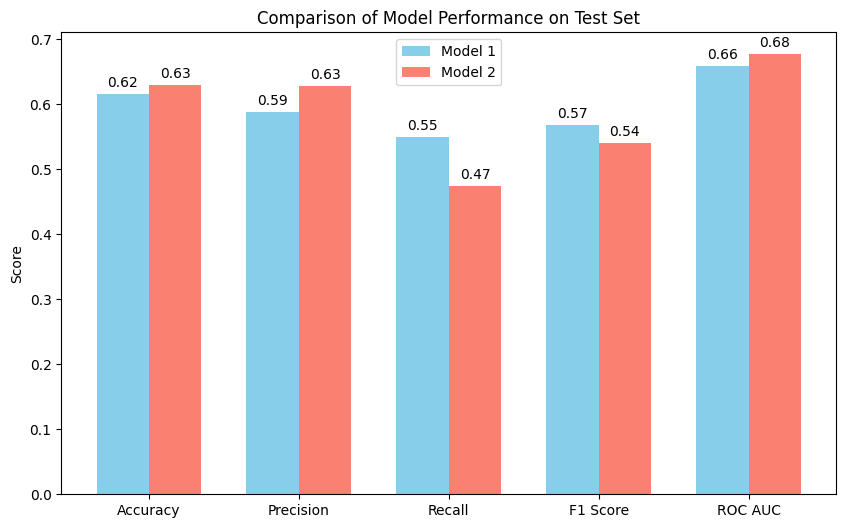

({'Accuracy': 0.6162328180856956,
  'Precision': 0.5881457186365233,
  'Recall': 0.55012599978087,
  'F1 Score': 0.5685009057971014,
  'ROC AUC': 0.6593196140444849},
 {'Accuracy': 0.6295252001409798,
  'Precision': 0.6286171295623092,
  'Recall': 0.4736496110441547,
  'F1 Score': 0.5402399400149962,
  'ROC AUC': 0.676883028708058})

In [87]:
compare_models_on_test(randomforest1_model_pipeline, randomforest_model_pipeline, X_test, y_test)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73c589da-27a4-44c1-8715-c36b04123c96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>